# Produce plots for manuscript

This is the code that can produce the 6-plot figure for manuscript using previously generated code.

In [5]:
# Imports 

import pickle
import sys
sys.path.append("./bin/")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D

## Load the data

Here are the lines which specify where the data is (with respect to the folder where 'jupyter notebook' command was used), and how many individual inputs are in the data folder. Since the data was generated in 3 parts, we have to specify three different locations.

In [12]:
# Define where the input files are (with all the parameters) 
foldername_input_feynman1 = "../run/input/feynman/feynman2/run08072023/" 
foldername_input_feynman2 = "../run/input/feynman/feynman3/run09072023/"
foldername_input_feynman3 = "../run/input/feynman/feynman4/run09072023/"

# Define where the output files are
foldername_output_feynman1 = "../run/output/feynman/feynman2/run08072023/"
foldername_output_feynman2 = "../run/output/feynman/feynman3/run09072023/"
foldername_output_feynman3 = "../run/output/feynman/feynman4/run09072023/"

# Number of files in the output folders
file_no_f1 = 80
file_no_f2 = 6
file_no_f3 = 6

# I've generated data for both NextNeighbour Random and NextNeighbour AF Hamiltonians. 
# The way the randomisation is defined, NNRand reference Hamiltonian has more accurate results
Init_Ham="NNRand"

# Define the ranges of L values (sizes of molecule) for both figures. If the ranges of L differ for
# finite temperatures, it has to be defined in L_range and L_DHD_range (the latter is for the Distance vs
# Hamiltonian distance 3-plot figure)
L = [4, 6, 8, 10]

L_range = [[L, L],
           [L[:-1], L[:-1]],
           [L[:-1], L[:-1]]]

L_DHD_range = [[L],
               [L[:-1]],
               [L[:-1]]]

The following lines take the raw data and put them in easier to understand format. This doesn't affect the final plots so nothing have to be changed here.

In [13]:
data = []

# Load files from feynman

for i in range(file_no_f1):
    filename_i = "input" + str(i+1) + ".txt"
    filename_o = "output" + str(i+1) + ".pickle"
    with open(foldername_output_feynman1 + filename_o, "rb") as fh:
        data.append(pickle.load(fh))
    with open(foldername_input_feynman1 + filename_i, 'r') as fh:
        content = fh.readlines()
        ham_type = content[4][10:-1]
        rand_type = content[5][11:-1]
        data[-1]["ham_type"] = ham_type
        data[-1]["rand_type"] = rand_type

# Load files from feynman2

for i in range(file_no_f2):
    filename_i = "input" + str(i+1) + ".txt"
    filename_o = "output" + str(i+1) + ".pickle"
    with open(foldername_output_feynman2 + filename_o, "rb") as fh:
        data.append(pickle.load(fh))
    with open(foldername_input_feynman2 + filename_i, 'r') as fh:
        content = fh.readlines()
        ham_type = content[4][10:-1]
        rand_type = content[5][11:-1]
        data[-1]["ham_type"] = ham_type
        data[-1]["rand_type"] = rand_type

# Load files from feynman3

for i in range(file_no_f3):
    filename_i = "input" + str(i+1) + ".txt"
    filename_o = "output" + str(i+1) + ".pickle"
    with open(foldername_output_feynman3 + filename_o, "rb") as fh:
        data.append(pickle.load(fh))
    with open(foldername_input_feynman3 + filename_i, 'r') as fh:
        content = fh.readlines()
        ham_type = content[4][10:-1]
        rand_type = content[5][11:-1]
        data[-1]["ham_type"] = ham_type
        data[-1]["rand_type"] = rand_type

# Write data in different categories

rand_types = [("ham_randNN", 4), ("state_rand", 4)]
temp_types = [("0", 1), ("1/2Gap", 1), ("1/4Bandwidth", 1)]

Sij_diff = {rtype[0]: {ttype[0]: {L_i: [] for L_i in L[:rtype[1]+ttype[1]]} for ttype in temp_types} for rtype in rand_types}
Sq_diff = {rtype[0]: {ttype[0]: {L_i: [] for L_i in L[:rtype[1]+ttype[1]]} for ttype in temp_types} for rtype in rand_types}
dist = {rtype[0]: {ttype[0]: {L_i: [] for L_i in L[:rtype[1]+ttype[1]]} for ttype in temp_types} for rtype in rand_types}
ham_dist = {rtype[0]: {ttype[0]: {L_i: [] for L_i in L[:rtype[1]+ttype[1]]} for ttype in temp_types} for rtype in rand_types[:2]}

for i in range(file_no_f1 + file_no_f2 + file_no_f3):
    if data[i]["info"]["temp_type"] == "value":
        temp_label = "0"
    elif data[i]["info"]["temp_type"] == "gap":
        if data[i]["info"]["temp_mul"] < 1:
            temp_label = "1/2Gap"
        else:
            temp_label = "2Gap"
    else:
        temp_label = "1/4Bandwidth"
    rand_label = data[i]["rand_type"]
    L_label = data[i]["info"]["L"]

    if data[i]["ham_type"] == Init_Ham:

        Sij_diff[rand_label][temp_label][L_label] += data[i]["diffSij"]
        Sq_diff[rand_label][temp_label][L_label] += data[i]["Sq_int"]

        dist[rand_label][temp_label][L_label] += data[i]["dist"]
        if rand_label != "state_rand":
            ham_dist[rand_label][temp_label][L_label] += data[i]["ham_dist"]

# Transform data to arrays (to see if they have equal number of data points)

Sij_diff_ar = {rtype: {ttype: {L_i: np.array(Sij_diff[rtype][ttype][L_i]) / L_i**2 for L_i in Sij_diff[rtype][ttype].keys()} 
                    for ttype in Sij_diff[rtype].keys()} for rtype in Sij_diff.keys()}
Sq_diff_ar = {rtype: {ttype: {L_i: np.array(Sq_diff[rtype][ttype][L_i]) / L_i for L_i in Sq_diff[rtype][ttype].keys()} 
                    for ttype in Sq_diff[rtype].keys()} for rtype in Sq_diff.keys()}

dist_ar = {rtype: {ttype: {L_i: np.array(dist[rtype][ttype][L_i]) for L_i in dist[rtype][ttype].keys()} 
                    for ttype in dist[rtype].keys()} for rtype in dist.keys()}
ham_dist_ar = {rtype: {ttype: {L_i: np.array(ham_dist[rtype][ttype][L_i]) for L_i in ham_dist[rtype][ttype].keys()} 
                    for ttype in ham_dist[rtype].keys()} for rtype in ham_dist.keys()}

# Change dist_ar to correct

if L_range[1][0] == L_range[1][1] == L_range[2][0] == L_range[2][1]:
    for l_i in L_range[1][0]:
        dist_ar["ham_randNN"]["1/2Gap"][l_i] = dist_ar["ham_randNN"]["1/2Gap"][l_i][:,0,0]
        dist_ar["ham_randNN"]["1/4Bandwidth"][l_i] = dist_ar["ham_randNN"]["1/4Bandwidth"][l_i][:,0,0]

# Prepare data for figures

Y_plots = [[Sq_diff_ar["ham_randNN"]["0"], Sq_diff_ar["state_rand"]["0"]],
            [Sq_diff_ar["ham_randNN"]["1/2Gap"], Sq_diff_ar["state_rand"]["1/2Gap"]],
            [Sq_diff_ar["ham_randNN"]["1/4Bandwidth"], Sq_diff_ar["state_rand"]["1/4Bandwidth"]]]

X_plots = [[ham_dist_ar["ham_randNN"]["0"], dist_ar["state_rand"]["0"]],
            [ham_dist_ar["ham_randNN"]["1/2Gap"], dist_ar["state_rand"]["1/2Gap"]],
            [ham_dist_ar["ham_randNN"]["1/4Bandwidth"], dist_ar["state_rand"]["1/4Bandwidth"]]]

Y_DHD_plots = [[dist_ar["ham_randNN"]["0"]],
               [dist_ar["ham_randNN"]["1/2Gap"]],
               [dist_ar["ham_randNN"]["1/4Bandwidth"]]]

X_DHD_plots = [[ham_dist_ar["ham_randNN"]["0"]],
               [ham_dist_ar["ham_randNN"]["1/2Gap"]],
               [ham_dist_ar["ham_randNN"]["1/4Bandwidth"]]]

Now all the important data is in Y_plots, X_plots, Y_DHD_plots, X_DHD_plots arrays, such that for example X_plots\[i\]\[j\]\[l\] correspond to all the x-values on i-th row and j-th column of the main figure for L\[l\] system size.

## Plot figures

Next lines correspond to plotting the figures. First the large 6 panel figure:

Text(-0.3, 0.8, '$T=\\frac{1}{4}E_{bandwidth}$')

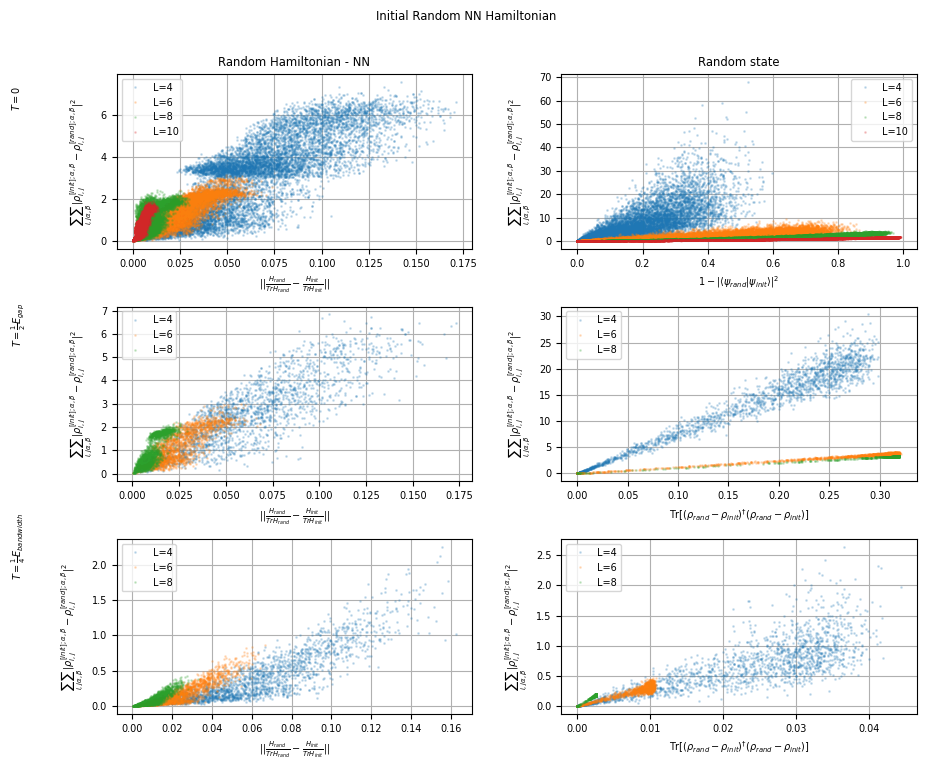

In [14]:
# Change font size for the figures
mpl.rcParams.update({'font.size': 7})

# Create figures (figsize changes the size of the figure)
figSq, axsSq = plt.subplots(3, 2, figsize=(10, 8))
# Adjust the formatting of the figures (amount of space between figures etc.)
plt.subplots_adjust(left = 0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.25, hspace=0.33)

# Super titles (above all plots)
figSq.suptitle("Initial Random NN Hamiltonian")

# Plot 6 panel figure. Loop goes through all of the panels
for i in range(3):
    # Labels for y axes
    axsSq[i][0].set_ylabel(r"$\sum_{i,j}\sum_{\alpha, \beta} |\rho_{i,j}^{[init];\alpha, \beta} - \rho_{i,j}^{[rand];\alpha ,\beta}|^2$")
    axsSq[i][1].set_ylabel(r"$\sum_{i,j}\sum_{\alpha, \beta} |\rho_{i,j}^{[init];\alpha, \beta} - \rho_{i,j}^{[rand];\alpha ,\beta}|^2$")
    for j in range(2):
        for l in L_range[i][j]:
            # Plot the data
            axsSq[i][j].plot(X_plots[i][j][l], Y_plots[i][j][l], 'o',label="L="+str(l), ms=1, alpha=0.2)
        axsSq[i][j].legend()
        axsSq[i][j].grid()

# Specific labels 

# Labels for x axes
axsSq[2][0].set_xlabel(r"$|| \frac{H_{rand}}{Tr H_{rand}} - \frac{H_{init}}{Tr H_{init}} ||$")
axsSq[1][0].set_xlabel(r"$|| \frac{H_{rand}}{Tr H_{rand}} - \frac{H_{init}}{Tr H_{init}} ||$")
axsSq[0][0].set_xlabel(r"$|| \frac{H_{rand}}{Tr H_{rand}} - \frac{H_{init}}{Tr H_{init}} ||$")
axsSq[2][1].set_xlabel(r"Tr$[(\rho_{rand} - \rho_{init})^\dag (\rho_{rand} - \rho_{init})]$")
axsSq[1][1].set_xlabel(r"Tr$[(\rho_{rand} - \rho_{init})^\dag (\rho_{rand} - \rho_{init})]$")
axsSq[0][1].set_xlabel(r"$1 - |\langle \psi_{rand} | \psi_{init}\rangle|^2$")

# Titles on top of the plots
axsSq[0][0].set_title("Random Hamiltonian - NN")
axsSq[0][1].set_title("Random state")

# Temperature labels
axsSq[0][0].text(-0.3, 0.8, r"$T=0$", transform=axsSq[0,0].transAxes, rotation="vertical")
axsSq[1][0].text(-0.3, 0.8, r"$T=\frac{1}{2}E_{gap}$", transform=axsSq[1,0].transAxes, rotation="vertical")
axsSq[2][0].text(-0.3, 0.8, r"$T=\frac{1}{4}E_{bandwidth}$", transform=axsSq[2,0].transAxes, rotation="vertical")

Then the 3 panel figure (Distance in state vs Hamiltonian distance). We can skip this part if we don't include it in the current version of the manuscript.

Text(-0.1, 0.8, '$T=\\frac{1}{4}E_{bandwidth}$')

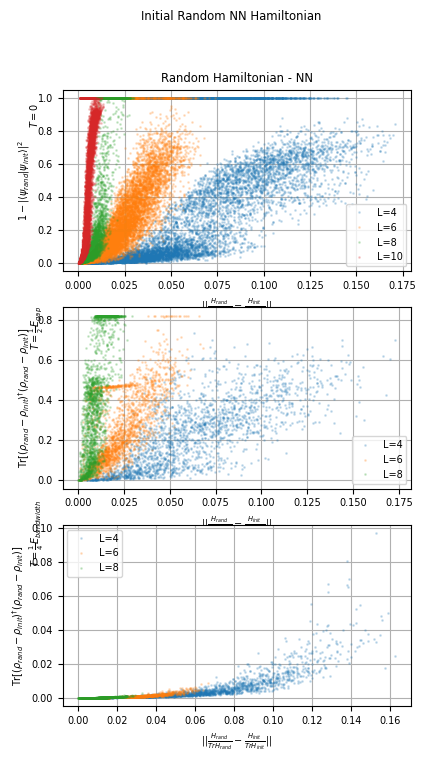

In [15]:
# Create figures
figDHD, axsDHD = plt.subplots(3, 1, figsize=(4.5, 8))

# Super title
figDHD.suptitle("Initial Random NN Hamiltonian")

# Plot 3 panel figure. Loop goes through all of the panels
for i in range(3):
    for j in range(1):
        for l in L_range[i][j]:
            # Plot the data
            axsDHD[i].plot(X_DHD_plots[i][j][l], Y_DHD_plots[i][j][l], 'o',label="L="+str(l), ms=1, alpha=0.2)
        axsDHD[i].legend()
        axsDHD[i].grid()

# Specific labels

# Labels for y axes
axsDHD[0].set_ylabel(r"$1 - |\langle \psi_{rand} | \psi_{init}\rangle|^2$")
axsDHD[1].set_ylabel(r"Tr$[(\rho_{rand} - \rho_{init})^\dag (\rho_{rand} - \rho_{init})]$")
axsDHD[2].set_ylabel(r"Tr$[(\rho_{rand} - \rho_{init})^\dag (\rho_{rand} - \rho_{init})]$")

# Labels for x axes
axsDHD[2].set_xlabel(r"$|| \frac{H_{rand}}{Tr H_{rand}} - \frac{H_{init}}{Tr H_{init}} ||$")
axsDHD[1].set_xlabel(r"$|| \frac{H_{rand}}{Tr H_{rand}} - \frac{H_{init}}{Tr H_{init}} ||$")
axsDHD[0].set_xlabel(r"$|| \frac{H_{rand}}{Tr H_{rand}} - \frac{H_{init}}{Tr H_{init}} ||$")

# Title
axsDHD[0].set_title("Random Hamiltonian - NN")

# Temperature labels
axsDHD[0].text(-0.1, 0.8, r"$T=0$", transform=axsDHD[0].transAxes, rotation="vertical")
axsDHD[1].text(-0.1, 0.8, r"$T=\frac{1}{2}E_{gap}$", transform=axsDHD[1].transAxes, rotation="vertical")
axsDHD[2].text(-0.1, 0.8, r"$T=\frac{1}{4}E_{bandwidth}$", transform=axsDHD[2].transAxes, rotation="vertical")

Plot figures

In [16]:
plt.show()